## ライブラリのインポート

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.initializers import TruncatedNormal
import matplotlib.pyplot as plt
%matplotlib inline

#tensorflowの互換性WARNING文の回避
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.FATAL)

np.random.seed(1234)


Using TensorFlow backend.


## データの生成

In [2]:
# 研修用データロード
from mldata import mldata
X,Y,X_train, X_test, Y_train, Y_test = mldata.mldata()

In [3]:
# # データロード
# # 使用するときは「ctrl+/」でコメントを外す

# mnist = datasets.fetch_openml('MNIST_784', version=1, return_X_y=False)

# n = len(mnist.data)
# N = 10000  # MNISTの一部を使う
# indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

# X = mnist.data[indices]
# y = mnist.target[indices]
# Y = np.eye(10)[y.astype(int)]  # 1-of-K 表現に変換

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)


In [4]:
# 読み込んだデータをそのまま表示。28*28の整数値が格納されている。
print(X_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  43.   0.
   0.   0.   0.   0.   0.   0.  51. 150. 240. 255. 150.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.  94.  15.
   0.   0.   0.   0.  12.  94. 238. 253. 253. 253. 192.   0.   0.   0.
   0. 

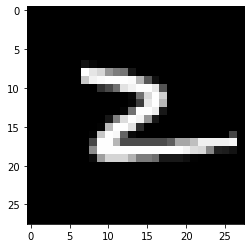

In [5]:
# X_trainの先頭のデータを表示
img = X_train[2]
plt.imshow(img.reshape((28,28)),cmap='Greys_r')

## モデル設定

In [6]:
n_in = len(X[0])  # 784
n_hidden = 200
n_out = len(Y[0])  # 10

model = Sequential()
model.add(Dense(n_hidden, input_dim=n_in))
model.add(Activation('relu'))

model.add(Dense(n_hidden))
model.add(Activation('relu'))

model.add(Dense(n_hidden))
model.add(Activation('relu'))

model.add(Dense(n_hidden))
model.add(Activation('relu'))

model.add(Dense(n_out))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])


In [7]:
# モデルのサマリを確認する
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_3 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
__________

## モデル学習

In [8]:
# epochs = 100
epochs = 50  # ReLU では学習が早く進む
batch_size = 200

model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)


Epoch 1/50
8000/8000 [==============================] - 1s 107us/step - loss: 13.0845 - acc: 0.1839
Epoch 2/50
8000/8000 [==============================] - 0s 47us/step - loss: 12.7385 - acc: 0.2094
Epoch 3/50
8000/8000 [==============================] - 0s 48us/step - loss: 12.7212 - acc: 0.2107
Epoch 4/50
8000/8000 [==============================] - 0s 50us/step - loss: 12.7212 - acc: 0.2107
Epoch 5/50
8000/8000 [==============================] - 0s 45us/step - loss: 12.7212 - acc: 0.2108
Epoch 6/50
8000/8000 [==============================] - 0s 46us/step - loss: 12.7212 - acc: 0.2107
Epoch 7/50
8000/8000 [==============================] - 0s 46us/step - loss: 12.7212 - acc: 0.2107
Epoch 8/50
8000/8000 [==============================] - 0s 41us/step - loss: 12.7212 - acc: 0.2107
Epoch 9/50
8000/8000 [==============================] - 0s 59us/step - loss: 12.7212 - acc: 0.2107
Epoch 10/50
8000/8000 [==============================] - 0s 46us/step - loss: 12.7212 - acc: 0.2107
Epoch 11

## 予測精度の評価

In [9]:
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)

2000/2000 [==============================] - 0s 90us/step
[12.824278671264649, 0.204]
